# Plotting DataFram with parsed dates vs not parsed dates

## Imports

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

## Data

In [17]:
df = pd.read_csv(
    f"../data/google_trends_chatGPT.csv",
    index_col=["Date"]
)

In [18]:
df.head()

,chat GPT
Date,
01/12/2022,1
02/12/2022,1
03/12/2022,2
04/12/2022,2
05/12/2022,4


### Check number of data points and date range

In [19]:
df.shape

(142, 1)

In [20]:
df.index[[0, -1]]

Index(['01/12/2022', '21/04/2023'], dtype='object', name='Date')

## Parsed Data

In [21]:
df_parsed = pd.read_csv(
    f"../data/google_trends_chatGPT.csv",
    parse_dates=["Date"],
    dayfirst=True,
    index_col=["Date"]
)

In [22]:
df_parsed.head()

,chat GPT
Date,
2022-12-01,1
2022-12-02,1
2022-12-03,2
2022-12-04,2
2022-12-05,4


## Verify the type of index data

In [23]:
print(f"{df.index[0]} - {type(df.index[0])}")

01/12/2022 - <class 'str'>


In [24]:
print(f"{df_parsed.index[0]} - {type(df_parsed.index[0])}")

2022-12-01 00:00:00 - <class 'pandas._libs.tslibs.timestamps.Timestamp'>


## Plot data: not parsed vs parsed date

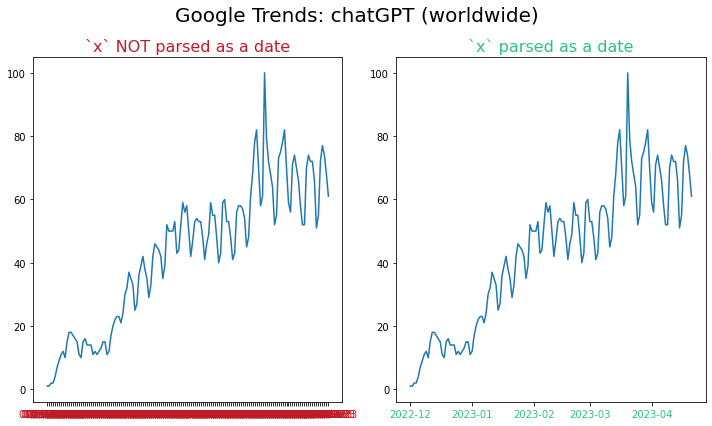

In [25]:
colour_red = "#c01c28"  # GNOME red 4
colour_green = "#2ec27e"  # GNOME green 4

fig, axs = plt.subplots(
    1, 2,
    figsize=(10,6),
    facecolor="white"
)
fig.suptitle(
    "Google Trends: chatGPT (worldwide)",
    fontsize=20
)

# Plot 1 - default
axs[0].plot(df)
axs[0].set_title(
    "`x` NOT parsed as a date",
    fontsize=16,
    color=colour_red
    )
# Plot 2 - parsed dates
axs[1].plot(df_parsed)
axs[1].set_title(
    "`x` parsed as a date",
    fontsize=16,
    color=colour_green
    )


axs[0].tick_params(
    axis="x",
    labelcolor=colour_red
)
axs[1].tick_params(
    axis="x",
    labelcolor=colour_green
)

plt.tight_layout()

plt.savefig(
    fname="plot1.png",
    format="png",
    dpi=125
);